In [1]:
import numpy as np
import scipy
import os
import sys
tokenlab_path=os.path.abspath("").replace('notebooks','src')
sys.path.insert(0,tokenlab_path)

from TokenLab.simulationcomponents import *
from TokenLab.simulationcomponents.usergrowthclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.tokeneconomyclasses import *
from TokenLab.simulationcomponents.transactionclasses import *
from TokenLab.simulationcomponents.agentpoolclasses import *
from TokenLab.simulationcomponents.pricingclasses import *
from TokenLab.simulationcomponents.supplyclasses import *
from TokenLab.simulationcomponents.addons import AddOn_RandomNoise, AddOn_RandomNoiseProportional
from utils.helpers import *
from matplotlib import pyplot as plt

In [2]:
ITERATIONS=60
HOLDING_TIME=1
SUPPLY=10**10
INITIAL_PRICE=0.5

In [3]:
usm_fiat=UserGrowth_Spaced(100,54000,ITERATIONS,log_saturated_space)

ap_fiat=AgentPool_Basic(users_controller=usm_fiat,transactions_controller=1000,currency='$')

This supply controller works as follows:

1) Removes random percentage of the tokens acquired from  circulation. It uses the equation of exchange to get the effective holding rate, to calculate this amount. It uses a prob distribution (by default uniform) to determine this.

2) Reintroduces some of the tokens into the supply. It uses a prob distribution (by default uniform) to determine this.

3) If the supply ends up being negative, then it doesn't remove tokens. This ensures that the supply doesn't reach 0.

This is a high level way to add a stochastic component to the supply

100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 22.44it/s]


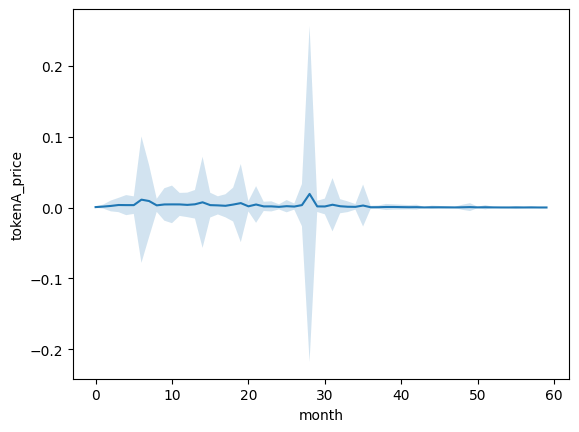

In [4]:
te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SupplyController_AdaptiveStochastic(supply=SUPPLY),
                      price_function=PriceFunction_EOE,token='tokenA',
                      price_function_parameters={'noise_addon':AddOn_RandomNoiseProportional(std_param=7)},
                      initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

In [5]:
reps

,tokenA_price,transactions_$,num_users,iteration,holding_time,effective_holding_time,supply,transactions_tokenA,repetition_run,iteration_time
0,0.001269,22864000,22864,1,0.555097,0.071074,1.000000e+10,2.538348e+07,0,0
1,0.000029,34362000,57226,2,0.603347,0.071074,9.998838e+09,1.633520e+10,0,1
2,0.000143,37553000,94779,3,0.378828,0.071074,9.454612e+09,4.967852e+11,0,2
3,0.005159,39479000,134258,4,1.301404,0.071074,9.958832e+09,3.583321e+11,0,3
4,0.000280,40863000,175121,5,1.213408,0.071074,1.072038e+10,9.610972e+09,0,4
...,...,...,...,...,...,...,...,...,...,...
55,0.000003,53752000,2722594,56,0.312151,0.044662,7.517106e+11,2.216966e+11,49,55
56,0.000054,53841000,2776435,57,1.090288,0.044662,1.081969e+12,2.052312e+13,49,56
57,0.000253,53929000,2830364,58,0.225257,0.044662,4.796613e+10,2.239035e+11,49,57
58,0.000002,54015000,2884379,59,0.100000,0.044662,2.190769e+11,2.132793e+10,49,58


<AxesSubplot:>

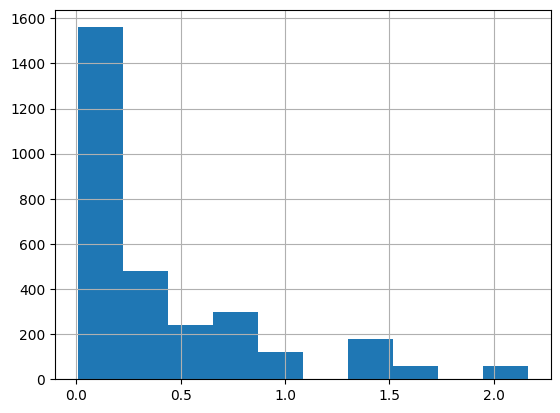

In [6]:
reps.effective_holding_time.hist()

<AxesSubplot:>

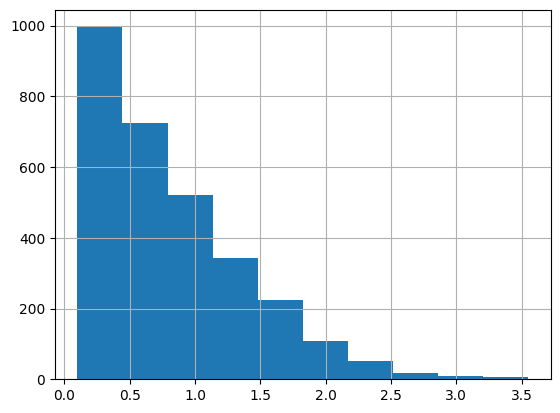

In [7]:
reps.holding_time.hist()

# Add investors that are dumping the token

In [8]:
investors=SupplyController_InvestorDumperSpaced(dumping_initial=100,dumping_final=10000,num_steps=ITERATIONS)
investors._dumping_store_original.shape

(60,)

100%|███████████████████████████████████████████| 50/50 [00:02<00:00, 21.90it/s]


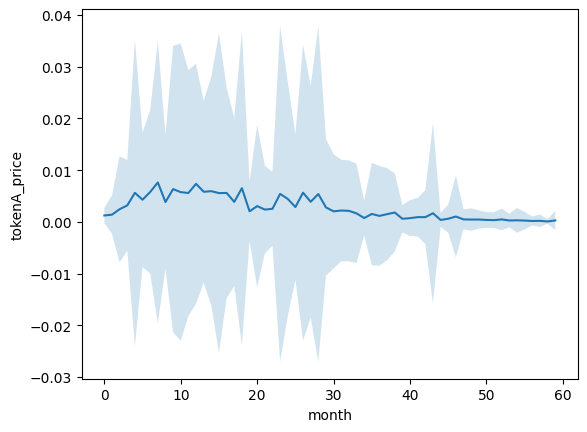

In [9]:
te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SupplyController_AdaptiveStochastic(supply=SUPPLY),
                      price_function=PriceFunction_EOE,token='tokenA',
                      price_function_parameters={'noise_addon':AddOn_RandomNoiseProportional(std_param=7)},
                      initial_price=INITIAL_PRICE)

te.add_agent_pools([ap_fiat])
te.add_supply_pools([investors])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot